<h2>Analyzing City and County of San Francisco Compensation Trends (2013-2020)</h2>

<h3>Background</h3>

This dataset contains [Human Resources data for City and County of San Francisco employees](https://data.sfgov.org/City-Management-and-Ethics/Employee-Compensation/88g8-5mnd) between 2013 and 2020. It consists of 971,764 rows and 22 columns. Today, I'm interested in exploring:

1. Are compensation adjustments keeping up with changes in cost of living?
2. How do salaries and benefits differ across departments and titles? 
3. What are the highest paying positions in 2020?

In addition to the above, I was hoping to look at attrition rates by department, as well. However, this is impossible due to limitations in the 'employee identifier' field. Per the [data dictionary](https://data.sfgov.org/api/views/88g8-5mnd/files/OMBVvreoXRjXG6oP4Ts4497dNxt14XlBqB6uIL6cq-o?download=true&filename=N:\EIS\DataCoordination\Metadata%20Spring%20Cleaning\CON_DataDictionary_Employee-Compensation.pdf): <i>'Employee
ID has been included here to allow users to reconstruct the original report. Note that each employee’s identifier will change each time this dataset is updated, so comparisons by employee across multiple versions of the dataset are not possible.'</i> It appears the dataset consists of two separate uploads: records between 2013-2017, and records between 2018-2020. Therefore, while an individual may have worked across all 8 years, they will have 2 different IDs: one for 2013-2017 and one for 2018-2020. As a result, it would be difficult to meaningfully look at attrition.

Another question I wanted to look at was how compensation differed by union/non-union status. However, I didn't feel confident trying to parse out who was union versus not from the 'Union' column without additional information.

<h3>Bottom Line</h3>
<li><b>Takeaway 1:</b> Compensation did appear to be increasing at a similar pace as the cost of living from 2013-2020, as measured by the Consumer Price Index for the San Francisco-Oakland-Hayward metropolitan area.
<br>
<br>
<li><b>Takeaway 2:</b> The standard deviation in total compensation across all employees/jobs has grown significantly since 2013, and is worth further investigation.
<br>
<br>
<li><b>Takeaway 3:</b> The two highest departments with the highest median total compensation are both legal departments. Departments with more tempory and part-time staff had lower median compensation. 
<br>
<br>   
<li><b>Takeaway 4:</b> Across most departments, benefits make up anywhere between 27% and 32% of total compensation.
<br>
<br>  
<li><b>Takeaway 5:</b> Eight of the top 20 highest paying positions in San Francisco are in the San Francisco Employee Retirement System Department.

<h3>Data Cleaning</h3>

The first step is changing the working directory and importing data.

In [1]:
cd /Users/colinsorensen/Desktop/datapractice/HR_Data

/Users/colinsorensen/Desktop/datapractice/HR_Data


In [2]:
#Import modules

import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import statsmodels.formula.api as smf  
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [3]:
#Import data
sf = pd.read_csv('salaries.csv')

#Adjust capitalization of cells/columns
sf.columns = map(str.lower, sf.columns)

/Users/colinsorensen/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


An error message shows that columns 5 & 6 imported with mixed datatypes. Let's look and see what those columns are.

In [4]:
#See names of columns at position 5 and 6
print(sf.columns[5:7])
print('')

#See unique values in column 5
print(sf.iloc[:,5].unique())
print('')

#See unique values in column 6
print(sf.iloc[:,6].unique())

Index(['department', 'union code'], dtype='object')

['DAT District Attorney' 'CRT Superior Court' 'DPH Public Health'
 'POL Police' 'REC Recreation & Park Commsn' 'AIR Airport Commission'
 'LIB Public Library' 'ADM Gen Svcs Agency-City Admin'
 'HSA Human Services Agency' 'FAM Fine Arts Museum' 'WTR Water Enterprise'
 'TTX Treasurer/Tax Collector' 'SHF Sheriff'
 'MTA Municipal Transprtn Agncy' 'RNT Rent Arbitration Board'
 'ETH Ethics Commission' 'MYR Mayor' 'CON Controller'
 'FIR Fire Department' 'DPW GSA - Public Works' 'PRT Port'
 'PUB Public Utilities Bureaus' 'HOM HOMELESSNESS SERVICES'
 'HSS Health Service System' 'WWE Wastewater Enterprise'
 'DBI Building Inspection' 'AAM Asian Art Museum' 'ADP Adult Probation'
 'CAT City Attorney' 'DT GSA - Technology' 'REG Elections'
 'JUV Juvenile Probation' 'CPC City Planning' 'BOS Board Of Supervisors'
 'DEM Emergency Management' 'ENV Environment' 'RET Retirement System'
 'HHP Hetch Hetchy Water & Power' 'PDR Public Defender'
 'CSS Child Su

It looks like column 5 is 'Department' and column 6 is 'Union Code.' Column 5's mixed data types are due to it NaN values, which are integers. Column 7's mixed data types are due to its varying number formats. To resolve this:
<li>Column 5 should be strings, so we can convert them accordingly.</li>
<li>Column 6 appears to be a combination of float and string variables, hence the combination of decimals and non-decimals; however, they do not have numeric meaning, so we can also convert them to strings. 
<br>
<br>
That said, one union code, 'S09', makes this column difficult to work with, since it is has a non-number character ('S'). Let's revise this to '09,' since this number hasn't already been taken.

In [5]:
#Change union code 'S09' to '09'
sf.loc[sf['union code'] == 'S09','union code'] = '09'

Now, each column can be converted to strings.

In [6]:
#Convert all 'nan' in 'department' and 'union code' columns with actual NaNs
sf[['department','union code']] = sf[['department','union code']].replace('nan',np.NaN)

#Then, convert 'department' column to strings
sf['department'] = sf['department'].astype(str)

In [7]:
#Convert 'union code' columns to strings
sf['union code'] = sf['union code'].fillna(0)
sf['union code'] = sf['union code'].astype(int).astype(str)
sf.loc[sf['union code'] == '0', 'union code'] = ''

In [8]:
#See unique values for 'union code'
print(sorted(sf['union code'].unique()))

['', '1', '104', '12', '121', '130', '16', '163', '164', '191', '195', '196', '197', '2', '200', '21', '216', '22', '220', '23', '236', '250', '251', '252', '253', '254', '257', '261', '3', '302', '311', '323', '330', '34', '351', '352', '353', '356', '357', '36', '377', '38', '39', '4', '40', '419', '498', '499', '535', '556', '580', '6', '604', '651', '7', '718', '790', '791', '792', '793', '798', '799', '856', '858', '9', '911', '929', '930', '933', '965', '969', '990']


Great, now both of those columns are strings--and we can see that the 'union code' column has been significantly cleaned up, too. Now that that's done, let's preview the first few rows of our data!

In [9]:
#See first 5 rows
pd.set_option('display.max_columns', None)  
sf.head()

,year type,year,organization group code,organization group,department code,department,union code,union,job family code,job family,job code,job,employee identifier,salaries,overtime,other salaries,total salary,retirement,health and dental,other benefits,total benefits,total compensation
0,Fiscal,2016,1,Public Protection,DAT,DAT District Attorney,311,Municipal Attorneys' Association,8100,Legal & Court,8177,Attorney (Civil/Criminal),35509,146066.70,0.00,1500.00,147566.70,26753.86,13067.98,10799.09,50620.93,198187.63
1,Fiscal,2014,1,Public Protection,CRT,CRT Superior Court,933,Court Unrepresented Bench Officers,SCRT,SF Superior Court,990C,Superior Court Judge,45378,9499.98,0.00,0.00,9499.98,0.00,12512.55,137.75,12650.30,22150.28
2,Calendar,2014,4,Community Health,DPH,DPH Public Health,791,"SEIU - Staff and Per Diem Nurses, Local 1021",2800,Public Health,2830,Public Health Nurse,38261,51816.35,0.00,3715.06,55531.41,12938.00,5633.08,4236.42,22807.50,78338.91
3,Fiscal,2013,1,Public Protection,POL,POL Police,911,Police Officers' Association,Q000,Police Services,Q052,Sergeant 3,36773,53377.38,3424.82,6474.06,63276.26,9506.14,4677.57,1033.66,15217.37,78493.63
4,Fiscal,2013,5,Culture & Recreation,REC,REC Recreation & Park Commsn,790,"SEIU - Miscellaneous, Local 1021",1400,"Clerical, Secretarial & Steno",1404,Clerk,13593,14422.84,0.00,0.00,14422.84,0.00,4419.08,1116.62,5535.70,19958.54


The column that jumps out the most is 'year type.' It shows that we have records from both the fiscal year <b>and</b> the calendar year, which means that we will have a lot of duplicative and/or similar data for rows. To address this, we should choose to either look at fiscal or calendar yearr records. After some quick research, it appears that salary changes for several employees [occur at the start of the new fiscal year](https://sfdhr.org/bargaining-complete), so it makes sense to choose fiscal year for this analysis. The rest of the columns are fairly straightforward with department information, salary information, etc.

Let's drop all the calendar year records and move forward with a new dataset that consists of Fiscal Year records only. We can also drop the 'year type' column while we're at it.

In [10]:
#See shape of dataset
print('Shape (Before):')
print(sf.shape)
print('')

#Create new dataframe with only Fiscal Calendar year records
sf = sf.loc[sf['year type'] == 'Fiscal',:].reset_index().drop(columns='index')

#Drop 'year type column'
del sf['year type']

#Print new shape of dataframe
print('Shape (After):')
print(sf.shape)

Shape (Before):
(971764, 22)

Shape (After):
(381174, 21)


From the above, we can see that the row count went from 971,764 down to 381,174 (and columns from 22 to 21). Not only is this row count more manageable to work with, it also means that each record is unique. Next, I'm curious to see the full time period of this dataset.

In [11]:
#Show min and max year
print('Min Year:')
print(sf.year.min())
print('')

print('Max Year:')
print(sf.year.max())

Min Year:
2013

Max Year:
2028


Well, that was unexpected! While it makes sense that the first year in 2013, it's likely a mistake that the last year is 2028. Let's examine those records.

In [12]:
sf[sf.year == 2028]

,year,organization group code,organization group,department code,department,union code,union,job family code,job family,job code,job,employee identifier,salaries,overtime,other salaries,total salary,retirement,health and dental,other benefits,total benefits,total compensation
229807,2028,1,Public Protection,CRT,nan,792,Utd Pub EmpL790 SEIU-Crt Clrks,0000,Untitled,420C,Deputy Court Clerk II,8540990,674.28,0.0,5.76,680.04,130.91,0.0,53.86,184.77,864.81


Not surprisingly, there is only one record logged as 2028. This is likely a data entry error. Unfortunately, I'm unsure which year this record should belong to (though my instinct says 2020); therefore, I think the best choice is to drop it. We'll use its row index (229807) to do so, and then confirm that our years are accurate.

In [13]:
sf = sf.drop(229807)

print(sorted(sf.year.unique()))

[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Next, we need to ensure that employee IDs are actually unique. As described above in 'Background', employee IDs did not remain constant across all 8 years. Instead, an employee will have one ID for each of their records between 2013-2017, and another ID for their records between 2018-2020. 

This means that the maximum number of records for any one employee ID should be 5 (for each year between 2013-2017). Let's see if there are any employee IDs that exceed 5 total records.

In [14]:
(sf['employee identifier'].value_counts() > 5).value_counts()

False    99805
True      8857
Name: employee identifier, dtype: int64

It appears that 8857 employee IDs have more than 5 records. Let's investigate some of theses IDs further.

In [15]:
sf['employee identifier'].value_counts()

8526577    13
2026       12
51801      12
46461      12
21259      12
           ..
16077       1
3787        1
1738        1
27011       1
8499025     1
Name: employee identifier, Length: 108662, dtype: int64

In [16]:
sf[sf['employee identifier'] == 8526577].sort_values(by='year')

,year,organization group code,organization group,department code,department,union code,union,job family code,job family,job code,job,employee identifier,salaries,overtime,other salaries,total salary,retirement,health and dental,other benefits,total benefits,total compensation
217746,2018,1,Public Protection,SHF,nan,39,"Stationary Engineers, Local 39",7300,Journeyman Trade,7373,"Sr. Stationary Eng, Sew Plant",8526577,2170.84,0.00,78.00,2248.84,0.00,0.00,0.00,0.00,2248.84
218040,2018,1,Public Protection,SHF,nan,39,"Stationary Engineers, Local 39",7300,Journeyman Trade,7372,"Stationary Eng, Sewage Plant",8526577,20161.81,0.00,820.00,20981.81,0.00,0.00,0.00,0.00,20981.81
234226,2018,1,Public Protection,SHF,nan,39,"Stationary Engineers, Local 39",7300,Journeyman Trade,7335,Senior Stationary Engineer,8526577,3690.15,0.00,146.00,3836.15,0.00,0.00,0.00,0.00,3836.15
281653,2018,1,Public Protection,SHF,nan,39,"Stationary Engineers, Local 39",7300,Journeyman Trade,7334,Stationary Engineer,8526577,65918.80,13689.50,18103.94,97712.24,18396.02,10245.49,10098.96,38740.47,136452.71
306749,2018,7,General City Responsibilities,NaN,nan,39,"Stationary Engineers, Local 39",7300,Journeyman Trade,7334,Stationary Engineer,8526577,346.40,0.00,77.63,424.03,0.00,0.00,0.00,0.00,424.03
226828,2019,1,Public Protection,SHF,nan,39,"Stationary Engineers, Local 39",7300,Journeyman Trade,7335,Senior Stationary Engineer,8526577,3384.06,0.00,130.00,3514.06,0.00,0.00,0.00,0.00,3514.06
231127,2019,1,Public Protection,SHF,nan,39,"Stationary Engineers, Local 39",7300,Journeyman Trade,7373,"Sr. Stationary Eng, Sew Plant",8526577,2236.16,0.00,78.00,2314.16,0.00,0.00,0.00,0.00,2314.16
349036,2019,1,Public Protection,SHF,nan,39,"Stationary Engineers, Local 39",7300,Journeyman Trade,7334,Stationary Engineer,8526577,64792.93,10357.72,18068.33,93218.98,19520.30,10248.46,10383.54,40152.30,133371.28
369488,2019,1,Public Protection,SHF,nan,39,"Stationary Engineers, Local 39",7300,Journeyman Trade,7372,"Stationary Eng, Sewage Plant",8526577,28526.78,479.10,1128.00,30133.88,0.00,0.00,0.00,0.00,30133.88
220474,2020,1,Public Protection,SHF,nan,39,"Stationary Engineers, Local 39",7300,Journeyman Trade,7335,Senior Stationary Engineer,8526577,38210.21,3253.85,10566.02,52030.08,7626.60,5393.34,3898.86,16918.80,68948.88


Employee 8526577 has 13 records spanning across 2018-2020. However, instead of of one record for each year, he/she has 4-5 records for every year--each representing a different job in the 'job' column. For example, employee 8526577 has four job titles: 'Senior Stationary Engineer', 'Stationary Engineer', 'Stationary Eng, Sewage Plant', and 'Sr. Stationary Eng, Sew Plant.' My original thought was that this individual changed jobs or was promoted, but this is not possible given that the same four titles appear in all three years.

Compensation in the public sector can be complicated, and occasionally employees will be paid their full salary using braided funding from different buckets. Therefore, my hypothesis is that employee 8526577 is doing a combination of the 4 jobs listed and being paid the sum of each recorded salary. We can test this out by looking at the sum of his/her total salary for each year.

In [17]:
sf[sf['employee identifier'] == 8526577].groupby('year')['total salary'].sum()

year
2018    125203.07
2019    129181.08
2020    137485.18
Name: total salary, dtype: float64

$137,485.18 is very reasonable for a Senior Engineer, so this theory makes sense. I also tested it out with a few other employee IDs, as well. We need to address the fact that a single employee can have multiple records in a single year in order to avoid treating their multiple rows as multiple employees. To do so, let's create a new dataframe which shows each employee's total compensation across each of their individual rows.

In [18]:
#Create dataframe that sums all compensation information for all rows for an employee within each year
sf[['organization group code','employee identifier']] = sf[['organization group code','employee identifier']].astype(str)
comp_info = pd.DataFrame(sf.sort_values(['employee identifier','year']).groupby(['employee identifier','year']).sum().reset_index())

#Show value counts for employee ids
comp_info['employee identifier'].value_counts()

8786        5
19852       5
4501        5
20656       5
37970       5
           ..
8980178     1
41988       1
8581866     1
12980142    1
8564456     1
Name: employee identifier, Length: 108662, dtype: int64

Our new dataframe shows no employee having more than 5 records--great, we're able to keep moving.

<h3>Analysis</h3>

Now that we have a dataframe that shows total compensation across an employees' set of records, we can answer the our first research question: <b>1. Are compensation adjustments keeping up with changes in cost of living?</b> 

In [19]:
comp_summary = pd.DataFrame(comp_info.groupby('year')['total compensation'].describe())

In [20]:
comp_summary

,count,mean,std,min,25%,50%,75%,max
year,,,,,,,,
2013,37255.0,101816.270289,64980.463205,-24362.26,50301.2050,103154.740,143398.7300,425605.01
2014,38212.0,103153.452859,67018.362344,-74082.61,47734.0575,104615.430,146638.4575,455269.77
2015,39753.0,105125.961223,68911.365526,-10846.32,45881.6000,106623.300,150224.6400,497505.00
2016,41167.0,106727.100003,69699.900182,-6930.06,48540.0000,107363.380,151632.5450,653497.33
2017,42359.0,110649.446655,71047.095104,-42615.24,54460.6900,111368.630,156357.4950,668412.41
2018,42676.0,111509.778196,70733.570410,-774.19,58707.4675,112447.145,157515.6475,676887.33
2019,44496.0,116314.354883,78125.353759,-4089.54,50036.1500,118390.990,167320.3800,807175.06
2020,42141.0,119804.382033,73093.447766,-2988.73,70480.5200,119991.170,167324.0100,707768.64


A few columns to look at here:

<li><b>County:</b> The total number of unique employees has increased 13% since 2013 (from 37,255 to 42,141).
<li><b>Standard Deviation:</b> While salaries are increasing steadily (see below), it appears that the variance in salaries across the spectrum is also increasing. This may be related to the influx of new employees, for example, if several of them are temp hires and are paid lower wages. However, based on the 66% increase in the 'max' column on the right (from \$425,605.01 to \$707,768.64), it's more likely that those on the other end of the spectrum are seeing large year-over-year salary increases. This warrants further investigation in another analysis.
<li><b>Min:</b> These numbers are accurate; a handful of employees employees owe the city and county each year, resulting in negative compensation amounts.
<li><b>50% (median):</b> Overall, the median total compensation appears to be rising at a steady pace. 

To see whether compensation is keeping up with cost of living, let's use the Consumer Price Index (CPI) during the same time period (2013-2020). CPI is reported every other month, as well as annually. We'll use the CPI data from the San Francisco-Oakland-Hayward metropolitan area (unfortunately it is not broken out by specific cities). We'll use CPI data from each April, since that is the maximum month available for 2020. See [here](https://www.bls.gov/cpi/data.htm) for the source data. 

The CPI is only a few rows of information, so I'll just type it out instead of importing. After that, we'll plot median total compensation against CPI on the same plot.

In [21]:
cpi = {'year':[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020],
       'cpi':[241.764, 247.932, 252.875, 259.386, 268.896, 278.039, 288.266, 290.304]}

cpi = pd.DataFrame(cpi).set_index('year')

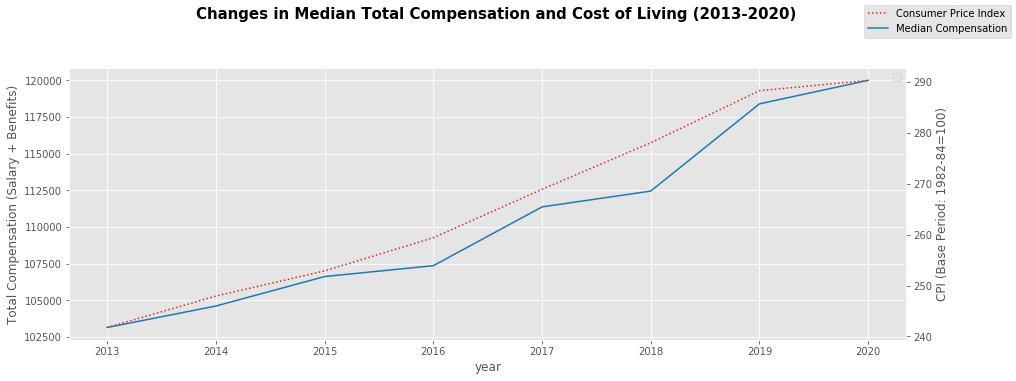

In [22]:
plt.style.use('ggplot')

fig, ax1 = plt.subplots(figsize=[15,5])
ax2 = ax1.twinx()
comp_summary['50%'].plot(ax=ax1,color=['tab:blue'])
cpi.plot(ax=ax2,color=['tab:red'],linestyle=':')
labels = ['Median Compensation','Consumer Price Index']
fig.legend(reversed(fig.legend().legendHandles), reversed(labels),framealpha=1)
ax1.legend('')
ax2.legend('')
ax1.set_ylabel('Total Compensation (Salary + Benefits)')
ax2.set_ylabel('CPI (Base Period: 1982-84=100)')
ax2.grid(False)
fig.suptitle('Changes in Median Total Compensation and Cost of Living (2013-2020)', fontsize=15, fontweight='bold',y=1.05,x=.52)
plt.show()

It looks like salary increases have generally trended with cost of living--good to know it's not just tech companies that are keeping up!

Let's tackle our second research question: <b>2. How do salaries and benefits differ across departments? </b> We can use the original dataset for this question. However, department names were included in the 2013-2017 data but not the 2018-2020 data, so we first have to fix this.

In [23]:
#Make new 'department_dict' column from existing department column (and set missing values to np.NaN)
sf['department_dict'] = sf['department']
sf.loc[sf['department'] == 'nan','department_dict'] = np.NaN

#Group by both department code and department names to get the unique index/values combinations
dept_dict_df = (pd.DataFrame(sf.groupby(['department code','department_dict']).size().reset_index())).drop(columns=0)

#Then convert to dictionary and map to original department column 
dept_dict = dept_dict_df.set_index('department code')['department_dict'].to_dict()
sf['department'] = sf['department code'].map(dept_dict)

In [24]:
#Pivot the data to show median total compensation by department
comp_by_dept = sf[sf['year'] == 2020].pivot_table(values=['total salary',
                                                          'total benefits',
                                                          'total compensation'], 
                                                  index='department', 
                                                  aggfunc='median').sort_values(by='total compensation',ascending=False)
comp_by_dept = comp_by_dept[['total salary','total benefits','total compensation']]
comp_by_dept

,total salary,total benefits,total compensation
department,,,
LLB Law Library,157380.000,65156.205,222536.205
CAT City Attorney,143966.575,50163.425,197158.110
FIR Fire Department,139434.170,44432.090,183620.460
SHF Sheriff,118686.650,38942.910,164947.650
PDR Public Defender,108822.000,45228.130,154794.740
SCI Academy Of Sciences,106874.870,43490.545,150517.780
DT GSA - Technology,104883.510,42539.720,148311.130
DAT District Attorney,101482.010,39640.090,145312.550
DBI Building Inspection,101971.020,41198.580,142746.805


It looks like legal departments pay the highest median salaries and total compensation in 2020, with the Law Library and City Attorney taking the top two spots. While neither of these are surprising, I dIDfind it interesting to see the fire department in third place.

On the other end of the spectrum, Parks & Recreation and Elections paid the lowest median wages. While there are plenty of high paid employees in the Parks and Recreation Department (for example, the highest total compensation in this department in 2020 was $326,204.37), the median is likely brought down by a large number of part-time workers that do not receive benefits, like lifeguards.

On that note, we need to see if the salary/benefits breakdown varies widely by department. To do so, we'll add two additional columns to the original dataset, and then create another pivot table.

In [25]:
#Create '% salary' column (the percentage of total compensation that is salary)
sf['% salary'] = sf['total salary']/sf['total compensation']

#Create '% benefits' column (the percentage of total compensation that are benefits)
sf['% benefits'] = sf['total benefits']/sf['total compensation']

In [26]:
#Pivot the data to show salary/benefits breakdown by department
breakdown_by_dept = sf[sf['year'] == 2020].pivot_table(values=['% salary',
                                                               '% benefits'],
                                                       index='department', 
                                                       aggfunc='median').sort_values(by='% benefits',ascending=False)
breakdown_by_dept = breakdown_by_dept[['% salary','% benefits']].sort_values(by='% benefits',ascending=False)
breakdown_by_dept

,% salary,% benefits
department,,
LIB Public Library,0.676516,0.323484
TTX Treasurer/Tax Collector,0.682074,0.317926
CSS Child Support Services,0.684145,0.315855
ART Arts Commission,0.687709,0.312291
CRT Superior Court,0.687811,0.312189
JUV Juvenile Probation,0.688679,0.311321
HSS Health Service System,0.690119,0.309881
ADP Adult Probation,0.691234,0.308766
ASR Assessor / Recorder,0.691380,0.308620


From the above chart, we can see that Public Library employees receive an estimated 32.5% of their total compensation as benefits (the highest percentage across all departments. On the other end, those working in the Elections and Parks & Recreation receive few benefits, since most of these jobs are hourly and part-time.

More importantly, it appears that the salary/benefit breakdown does not vary too significantly across departments. Most departments pay between 27 and 32 percent of their compensation in benefits--a range of 5 percent.

Finally, let's look at our last question: <b>3. What are the highest paying positions in 2020?</b> Again, we can use the original dataset here, because individuals in these higher paying roles only have one record per year.

In [27]:
sf[sf['year'] == 2020][['job',
                        'department',
                        'total compensation']].nlargest(20,'total compensation').sort_values(by='total compensation',ascending=False)

,job,department,total compensation
218378,Chief Investment Officer,RET Retirement System,707768.64
267824,Managing Director,RET Retirement System,595621.43
327543,Managing Director,RET Retirement System,595396.84
335839,Managing Director,RET Retirement System,567974.52
328342,"Physician Administrator, DPH",DPH Public Health,555969.58
328750,Managing Director,RET Retirement System,548684.44
262107,"Physician Administrator, DPH",DPH Public Health,524386.03
230201,Asst Med Examiner,ADM Gen Svcs Agency-City Admin,510202.33
313069,Senior Deputy Sheriff,SHF Sheriff,509065.49
321322,Director,RET Retirement System,495647.75


Turns out that if you want to make real money in San Francisco, you should go work for SFERS! Eight of the top 20 highest total compensation packages in 2020 are in this department.

<h3>Conclusion</h3>
That concludes our exploratory data analysis (EDA) of the City and County of San Francisco's salaries over time and across departments/jobs. We learned a little bit about how salaries have changed, which departments pay the most, how compensation is broken down across departments, and which positions pay the most overall. We also cleaned several columns that needed some attention for future analysis. With more information and columns, we would be able to analyze demographics or predict attrition using inferential statistics. 

<h3>Further Analysis</h3>
While there are plenty of other questions to answer with the provided dataset, in order to address any inequities that may exist, it makes sense to further explore why the standard deviation of total compensation has been increasing so significantly since 2013.